In [1]:
fn = r"C:/Users/me/Downloads/traces.txt"

In [7]:
with open(fn) as fp:
    content = [line.strip() for line in fp.readlines()]

In [21]:
content

['-120,0.051981,10.80,0;-120,-0.030111,10.80,0;-120,0.0014655,10.80,0;-120,0.067361,10.80,0;-120,-0.049222,10.80,0;-120,-0.032352,10.80,0;-120,0.017486,10.80,0;-120,0.091279,10.80,0;-120,-0.032869,10.80,0;-120,-0.0098813,10.80,0;-120,0.0015353,10.80,0;-120,-0.023953,10.80,0;-120,0.0004864,10.80,0;',
 '-120,0.0098261,0.01,0;-120,0.040148,0.01,0;-120,0.063918,0.01,0;-120,-0.0091429,0.01,0;-120,-0.024241,0.01,0;-120,0.0098032,0.01,0;-120,0.019047,0.01,0;-120,-0.078904,0.01,0;-120,0.042074,0.01,0;-120,-0.045791,0.01,0;-120,-0.021884,0.01,0;-120,0.0025893,0.01,0;-120,0.076991,0.01,0;',
 '-120,0.083208,0.01,0;-120,0.016729,0.01,0;-120,0.032692,0.01,0;-120,0.064239,0.01,0;-120,0.011669,0.01,0;-120,-0.06514,0.01,0;-120,-0.023108,0.01,0;-120,0.0069681,0.01,0;-120,-0.10469,0.01,0;-120,-0.014565,0.01,0;-120,-2.6034e-05,0.01,0;-120,-0.0036559,0.01,0;-120,-0.044792,0.01,0;',
 '-120,-0.024523,0.01,0;-120,-0.026988,0.01,0;-120,0.040498,0.01,0;-120,-0.035685,0.01,0;-120,-0.017996,0.01,0;-120,-0.066701

Shape: ?, 13, 4

In [18]:
import numpy as np

In [31]:
arr1 = np.asarray([[[float(i) for i in subline.split(",")] for subline in line.split(";")[:-1]] for line in content])

In [32]:
arr2 = np.asarray([float(i) for line in content for subline in line.split(";")[:-1] for i in subline.split(",")]).reshape(-1, 13, 4)

In [37]:
np.array_equal(arr1, arr2)

True

In [38]:
data = arr2

In [39]:
data.shape

(1533, 13, 4)

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
from ipywidgets import interact

In [50]:
@interact
def show(voltage_step:(0,12)):
    ax = plt.subplot(111)
    plt.plot(data[:, voltage_step, 0], color='k')
    plt.ylim([-130, 30])
    
    ax2 = ax.twinx()
    plt.plot(data[:, voltage_step, 1], color='magenta')
    plt.ylim([-10, 1])

interactive(children=(IntSlider(value=6, description='voltage_step', max=12), Output()), _dom_classes=('widget-interact',))

In [52]:
@interact
def show(voltage_step:(0,12)):
    plt.plot(data[:, :, 1], color='k', alpha=.2)
    plt.plot(data[:, voltage_step, 1], color='magenta')
    plt.ylim([-10, 1])

interactive(children=(IntSlider(value=6, description='voltage_step', max=12), Output()), _dom_classes=('widget-interact',))

# Activation

In [56]:
I = np.min(data[:, :, 1], axis=0)

In [57]:
I.shape

(13,)

In [60]:
V = np.max(data[:, :, 0], axis=0)

Text(0,0.5,'Inward current [nA]')

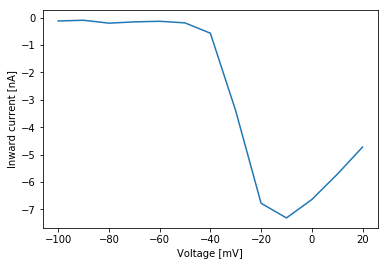

In [62]:
plt.plot(V, I)
plt.xlabel("Voltage [mV]")
plt.ylabel("Inward current [nA]")

$$ I = g \cdot (V - E_{rev}) $$
 
$$ g = \frac{I}{V - E_{rev}} $$

In [63]:
E_rev = 61 * np.log10(140/10)
E_rev

69.91381017637252

In [64]:
g = I / (V - E_rev)

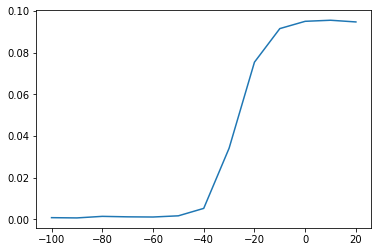

In [66]:
plt.plot(V, g)

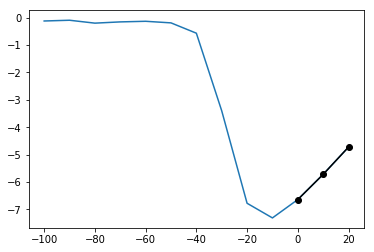

In [68]:
plt.plot(V, I)
plt.plot(V[-3:], I[-3:], c='k', marker='o')

In [69]:
from scipy.optimize import curve_fit

In [70]:
x = V[-3:]
y = I[-3:]

$$ y = a \cdot x + b $$

In [71]:
def linearFunction(x, a, b):
    return a*x+b

In [175]:
a, b = curve_fit(linearFunction, x, y)[0]

In [176]:
a, b

(0.09573499999802748, -6.653050000016685)

In [ ]:
0.09555765860065789, -6.6501013781606035

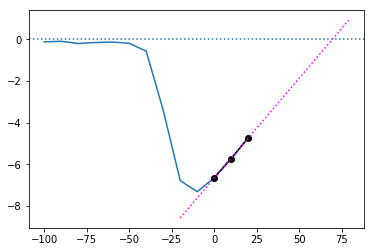

In [75]:
plt.plot(V, I)
plt.plot(V[-3:], I[-3:], c='k', marker='o')

xs = np.arange(-20, 80)
ys = a * xs + b

plt.plot(xs, ys, c='magenta', ls=':')
plt.axhline(0, ls=':')

In [76]:
E_rev_experimental = -b/a

In [77]:
E_rev_experimental

69.49443777253632

# Conductance

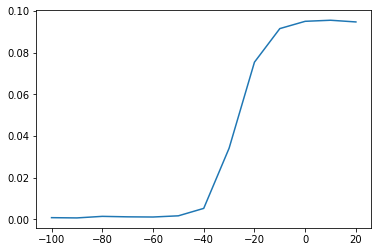

In [78]:
plt.plot(V, g)

$$ \sigma(x) = \frac{1}{1+exp(-x)} $$

In [97]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [98]:
xs = np.arange(-10, 10)
ys = sigmoid(xs)

In [99]:
from autograd import grad
import autograd.numpy as np

$$ \sigma'(x) = \sigma(x) (1 - \sigma(x))$$

In [100]:
grad_ = grad(sigmoid)

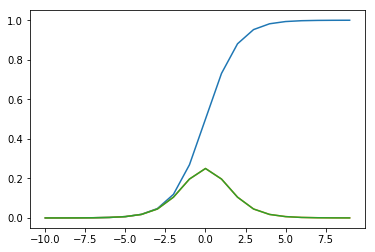

In [104]:
plt.plot(xs, ys)
plt.plot(xs, [grad_(float(i)) for i in xs])
plt.plot(xs, [grad_(float(i)) for i in xs])

In [105]:
def sigmoid(x, A, b, c, e):
    return A * 1/(1+np.exp(-b*x+c))+e

In [123]:
p = curve_fit(sigmoid, V, g, p0=[g.max(), -1., 1., 1.])[0]

C:\Users\me\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


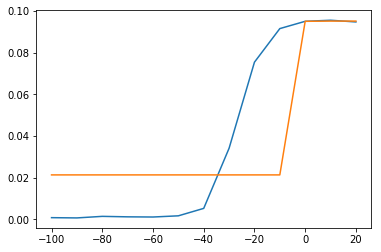

In [124]:
plt.plot(V, g)
plt.plot(V, sigmoid(V, *p))

In [111]:
from scipy.optimize import minimize

In [116]:
def helper(p, V, g):
    A, b, c, e = p
    return ((g-sigmoid(V, A, b, c, e))**2).sum()

In [133]:
m = minimize(helper, [1., .1, .2, 1.], args=(V, g))

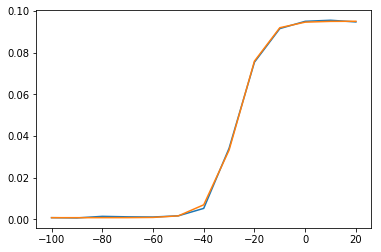

In [134]:
plt.plot(V, g)
plt.plot(V, sigmoid(V, *m.x))

In [135]:
m.x

array([ 9.42707538e-02,  2.01312730e-01, -5.39469672e+00,  7.31395759e-04])

# Gradient descent

$$ y = a \cdot + b $$

In [137]:
a = np.random.randn()
b = np.random.randn()

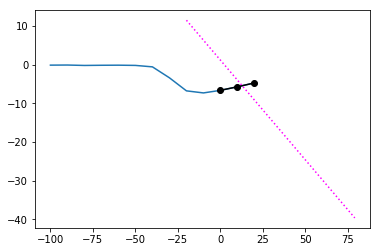

In [138]:
plt.plot(V, I)
plt.plot(V[-3:], I[-3:], c='k', marker='o')

xs = np.arange(-20, 80)
ys = a * xs + b

plt.plot(xs, ys, c='magenta', ls=':')

In [149]:
x = V[-3:]
y = I[-3:]

In [150]:
gradient_a = np.sum(2/len(x) * (y - a * x - b) * x)

In [151]:
gradient_b = np.sum(-2/len(x)* (y - a * x - b))

In [157]:
x

array([ 0., 10., 20.])

(0.09555765860065789, -6.6501013781606035, 69.59255255459786)

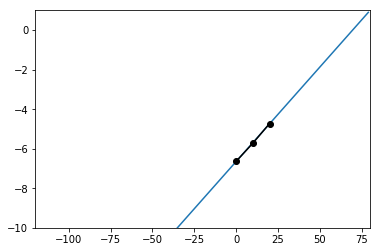

In [174]:
iterations = 10000
lr = 0.001

plt.xlim([-120, 80])
plt.ylim([-10, 1])

err = []

a = 1
b = 2

for i in range(iterations):
    gradient_a = -2/len(x) * ((y - (a * x + b)) * x).sum()
    gradient_b = -2/len(x) * ((y - (a * x + b))).sum()
    
    a = a - lr * gradient_a
    b = b - lr * gradient_b
    
#     print(((y-a*x-b)**2).sum())

    err.append(((y-a*x-b)**2).sum())
    
    if i % 200 == 0:
        pass
    
xs = np.arange(-40, 80)
plt.plot(xs, a*xs+b)
plt.plot(x, y, c='k', marker='o')
        
a, b, -b/a

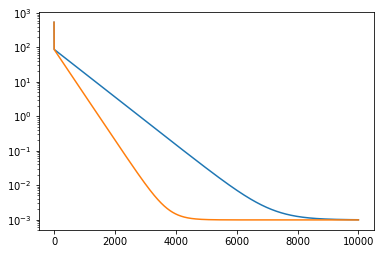

In [180]:
plt.plot(err)
plt.plot(err_w_momentum)
plt.yscale("log")

# MOMENTUM

(0.09573486661598617, -6.653047782249279, 69.49451142953102)

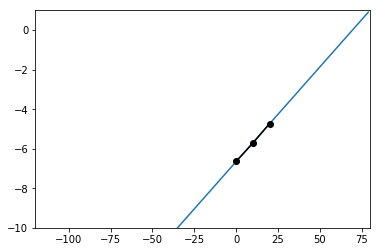

In [179]:
iterations = 10000
lr = 0.001

plt.xlim([-120, 80])
plt.ylim([-10, 1])

err_w_momentum = []

a = 1
b = 2

past_gradient_a = 0
past_gradient_b = 0
momentum = 0.9

for i in range(iterations):
    gradient_a = -2/len(x) * ((y - (a * x + b)) * x).sum()
    gradient_b = -2/len(x) * ((y - (a * x + b))).sum()
    
    a = a - lr * (gradient_a + momentum * past_gradient_a)
    b = b - lr * (gradient_b + momentum * past_gradient_b)
    
    past_gradient_a = gradient_a
    past_gradient_b = gradient_b
    
#     print(((y-a*x-b)**2).sum())

    err_w_momentum.append(((y-a*x-b)**2).sum())
    
    if i % 200 == 0:
        pass
    
xs = np.arange(-40, 80)
plt.plot(xs, a*xs+b)
plt.plot(x, y, c='k', marker='o')
        
a, b, -b/a

# Autograd sigmoid

In [207]:
from autograd.misc.optimizers import sgd, adam

In [194]:
def objective(params, iter):
    return ((g-sigmoid(V, *params))**2).sum()

In [195]:
objective_gradient = grad(objective)

In [199]:
objective_gradient([1., 2., 3., 4.], 0)

[array(19.99456465),
 array(4.05285067e-06),
 array(-0.35711716),
 array(107.09929188)]

In [231]:
p = sgd(objective_gradient, [1., 2., 3., 4.], step_size=.1, num_iters=10000)

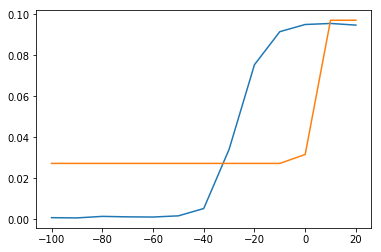

In [232]:
plt.plot(V, g)
plt.plot(V, sigmoid(V, *p))